# End-to-end Multi-class Dog Breed Classification

# 1. Problem

Identifying the breed of a dog based on picture



# 2. Data

The data we are using is from Kaggle's dog breed identification competition
https://www.kaggle.com/c/dog-breed-identification/data


# 3. Evaluation

This is file with prediction probabilites with each dog breed test image.

# 4. Features

Some information about the data:

* We are dealing with images (unstructered data) so it is probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs
* There are 10,000+ images in training set (There are labels)
* There are 10,000+ images in test set (There are no labels)



In [4]:
import os
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/DogVision/'))
!unzip drive/MyDrive/Colab\ Notebooks/DogVision/dog-breed-identification.zip -d drive/MyDrive/Colab\ Notebooks/DogVision/


['dog-breed-identification.zip']
Archive:  drive/MyDrive/Colab Notebooks/DogVision/dog-breed-identification.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of drive/MyDrive/Colab Notebooks/DogVision/dog-breed-identification.zip or
        drive/MyDrive/Colab Notebooks/DogVision/dog-breed-identification.zip.zip, and cannot find drive/MyDrive/Colab Notebooks/DogVision/dog-breed-identification.zip.ZIP, period.


In [2]:

# import necessary tools
import tensorflow as tf
print("TF version:", tf.__version__)
import tensorflow as hub
print("Hub version:", hub.__version__)

# check for gpu availability
print("GPU", "available!" if tf.config.list_physical_devices("GPU") else "not available!")

TF version: 2.15.0
Hub version: 2.15.0
GPU available!


## Getting our data ready (turnng into tensors)

Our data has to be numerical so that it was we are doing, turning it into tensors.

Start by accessing data and staritng by labels

In [4]:
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DogVision/labels.csv")
print(labels_csv.describe())
labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

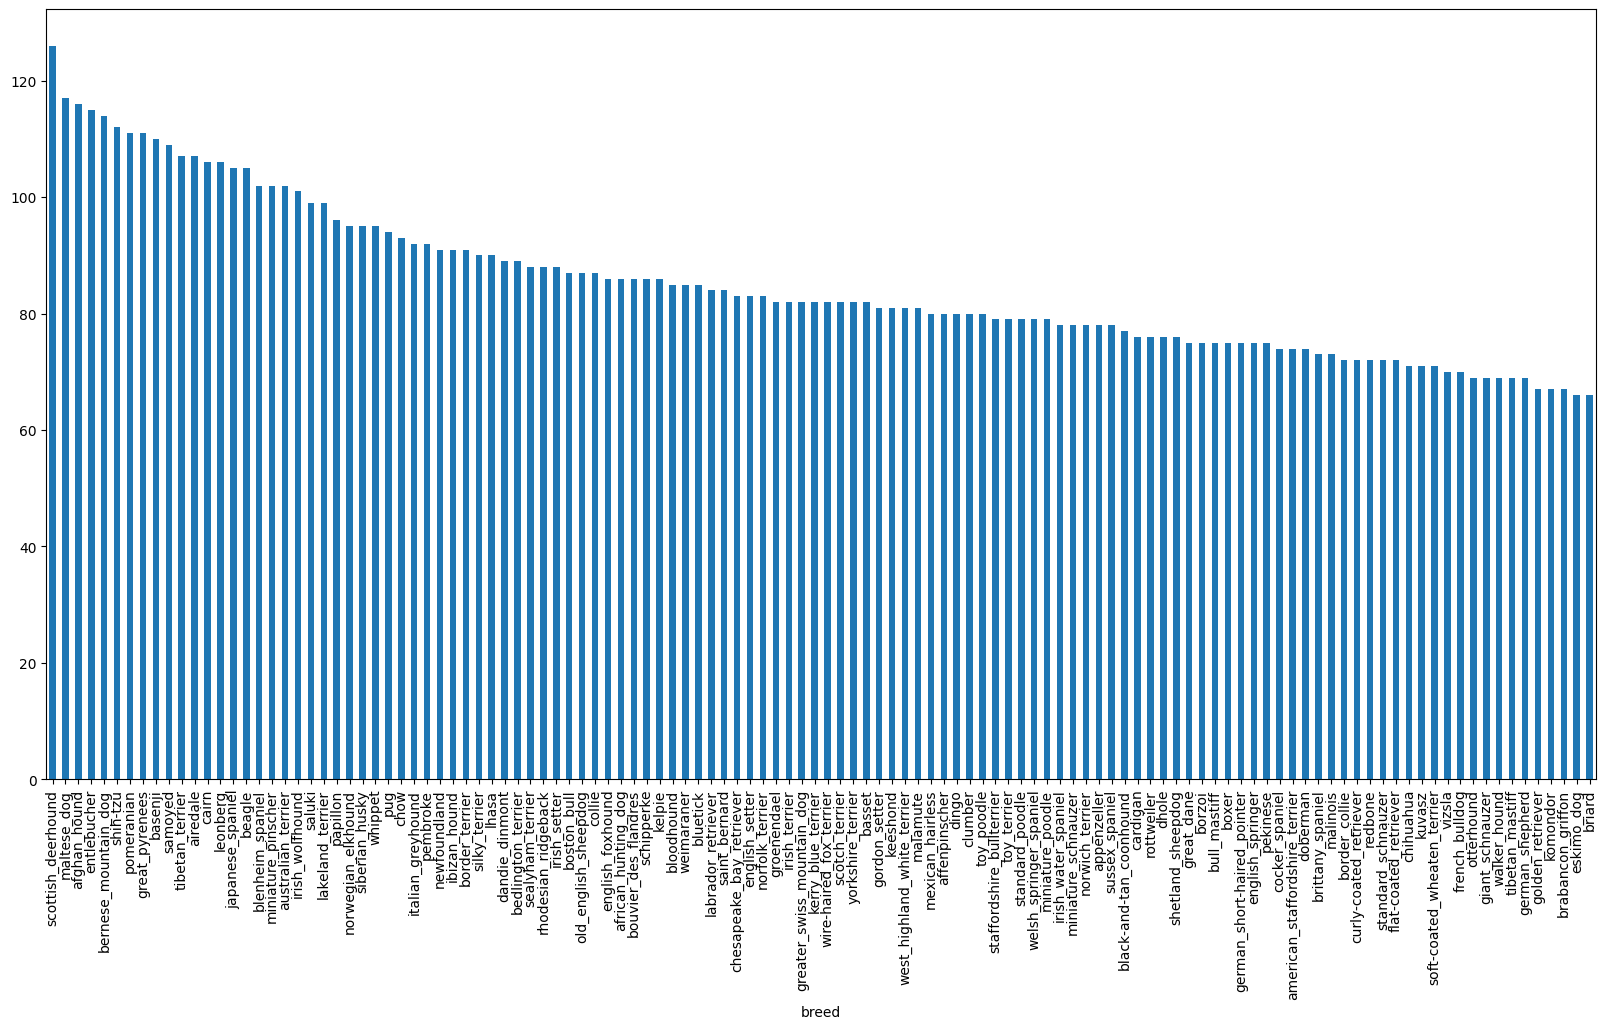

In [7]:
# how many images are there of each breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [8]:
labels_csv["breed"].value_counts().median()

82.0

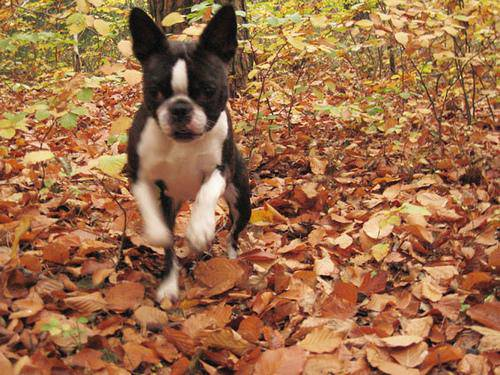

In [13]:
# lets view an image
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/DogVision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### getting images and their labels
Lets get a list of all images and there file pathnames

In [15]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [21]:
#create pathnames from image id's
filenames = ["/content/drive/MyDrive/Colab Notebooks/DogVision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

In [22]:
filenames

['/content/drive/MyDrive/Colab Notebooks/DogVision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Colab Notebooks/DogVision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Colab Notebooks/DogVision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Colab Notebooks/DogVision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/DogVision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Colab Notebooks/DogVision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/DogVision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Colab Notebooks/DogVision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/DogVision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Colab Notebooks/DogVision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 '/content/drive/MyDrive/Colab Notebooks

In [24]:
# check whether num of filenames mathces num of actual images files
len(filenames) == labels_csv.shape[0]

True

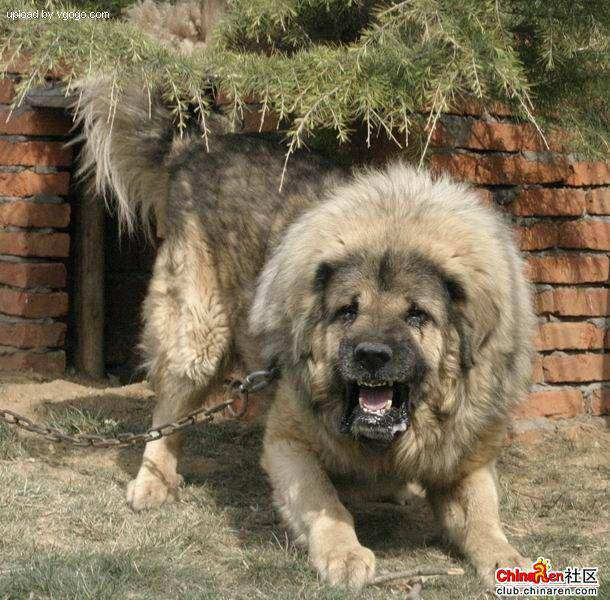

In [27]:
Image(filenames[9000])

In [28]:
labels_csv["breed"][9000]

'tibetan_mastiff'



```
# Since we have our trianing images filepaths in list, let's now prepare our labels
```



In [31]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [32]:
len(labels)

10222

In [34]:
# see if number of labesl matches number of files names
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames")
else:
  print("Number of labels does not match number of filenames")

Number of labels matches number of filenames


In [36]:
# find unique label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [37]:
len(unique_breeds)

120

In [39]:
# turn single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [41]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [42]:
len(boolean_labels)

10222

In [46]:
# exampe tunring boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where labels occur
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
